# AIM 5001 Week 10 Assignment: Tidying and Transforming Data

In [25]:

# import pandas library
import pandas as pd
# import numpy
import numpy as np
# import matplotlib.pyplot
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

## Q1: 
(1) (4 Points) Create a .CSV file that includes all of the information shown above. You are required to use a
“wide” structure similar to how the information appears above, so that you can practice both data tidying and
the data wrangling transformations described in Chapter 8 of the “Python for Data Analysis” textbook. Be sure
to include any blank cells or rows shown in the above graphic. Load your .CSV file into you GitHub repository.


In [26]:
# By using "np.nan" to include any blank cells or rows
# Reference is about "np.nan"
# Creating the data in pandas

file = pd.DataFrame([[427.0,221.0,212.0,503.0,1841.0], [62.0,12.0,20.0,102.0,305.0], [np.nan,np.nan,np.nan,np.nan,np.nan],[694.0,4840.0,383.0,320.0,201.0],[117.0,415.0,65.0,129.0,61.0]],
                    
                    index = [['ALASKA', 'ALASKA', '' , 'AM WEST', 'AM WEST'], ['on time', 'delayed', '' , 'on time', 'delayed']],
                   
                    columns=['Los Angeles','Phoenix','San Diego','San Francisco','Seattele'])


file

Los Angeles  Phoenix  San Diego  San Francisco  Seattele
ALASKA  on time        427.0    221.0      212.0          503.0    1841.0
        delayed         62.0     12.0       20.0          102.0     305.0
                         NaN      NaN        NaN            NaN       NaN
AM WEST on time        694.0   4840.0      383.0          320.0     201.0
        delayed        117.0    415.0       65.0          129.0      61.0

In [27]:
file.to_csv('./J_Chen_W10_data.csv')

#### The .CSV file I loaded to my GitHub repository: https://github.com/JinmingChen12/AIM-5001/blob/master/J_Chen_W10_data.csv

Reference: https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe


## Q2: 
(2) (12 Points) Read your .CSV file from your GitHub repository into a Jupyter Notebook, and use your
knowledge of combining and reshaping data in Pandas to tidy and transform your data. To get started, think
about how you would want the data to appear if it were converted to “long” format, 

e.g., how would you define a “single observation” for the data shown in the graphic?;<br>
How many key values are associated with each data value?;<br>
How many columns should your long format structure contain based on the information provided in the graphic shown above?<br>
What would the column headings for the long structure be?; etc. <br>

Use your answers to these questions to guide your reshaping/transformational work on the data. Your
reshaping/transformational steps must include converting the above table to a “tidy” long format.
Additional transformational steps (e.g., filling in missing data values, renaming columns, etc.) should be
performed as needed to ensure that your data is, in fact, “tidy”. 

### Read the .CSV file

In [28]:
df= "https://raw.githubusercontent.com/JinmingChen12/AIM-5001/master/J_Chen_W10.csv"
df1 = pd.read_csv(df)
df1

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


### Data Cleaning: 

#### 1. Removing the blank cells or rows

In [29]:
df1 = df1.dropna()
df1

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


#### 2. Renaming columns

In [30]:
df1 = df1.rename(columns={'Unnamed: 0':'Airline', 'Unnamed: 1':'Performance'})
df1

,Airline,Performance,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


#### 3.Adding multiple index for  'Airline' and	'Performance'

In [31]:
df2 = df1.set_index(['Airline', 'Performance'])
df2

Los Angeles  Phoenix  San Diego  San Francisco  Seattele
Airline Performance                                                          
ALASKA  on time            427.0    221.0      212.0          503.0    1841.0
        delayed             62.0     12.0       20.0          102.0     305.0
AM WEST on time            694.0   4840.0      383.0          320.0     201.0
        delayed            117.0    415.0       65.0          129.0      61.0

#### 4.  Converting the table to long format

In [32]:
df_long = df2.stack()
long = pd.DataFrame(df_long)
long

0
Airline Performance                      
ALASKA  on time     Los Angeles     427.0
                    Phoenix         221.0
                    San Diego       212.0
                    San Francisco   503.0
                    Seattele       1841.0
        delayed     Los Angeles      62.0
                    Phoenix          12.0
                    San Diego        20.0
                    San Francisco   102.0
                    Seattele        305.0
AM WEST on time     Los Angeles     694.0
                    Phoenix        4840.0
                    San Diego       383.0
                    San Francisco   320.0
                    Seattele        201.0
        delayed     Los Angeles     117.0
                    Phoenix         415.0
                    San Diego        65.0
                    San Francisco   129.0
                    Seattele         61.0

In [33]:
long1 = pd.melt(df1, id_vars=['Airline','Performance'])
long1

,Airline,Performance,variable,value
0,ALASKA,on time,Los Angeles,427.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


#### Above table is a long format table.  




Reference: 
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
2. https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

## Q3: 

(3) (10 Points) Using your reshaped/transformed data, perform analysis to compare the arrival delays for the
two airlines. Two questions you must answer: 

### 1. For each city, which airline had the best on time performance?;<br>

In [34]:
# Finding the 'on time' data in the table

ontime = long1[long1['Performance']=='on time']
ontime

,Airline,Performance,variable,value
0,ALASKA,on time,Los Angeles,427.0
2,AM WEST,on time,Los Angeles,694.0
4,ALASKA,on time,Phoenix,221.0
6,AM WEST,on time,Phoenix,4840.0
8,ALASKA,on time,San Diego,212.0
10,AM WEST,on time,San Diego,383.0
12,ALASKA,on time,San Francisco,503.0
14,AM WEST,on time,San Francisco,320.0
16,ALASKA,on time,Seattele,1841.0
18,AM WEST,on time,Seattele,201.0


Text(0.5, 1.0, 'On Time Airline in Each City')

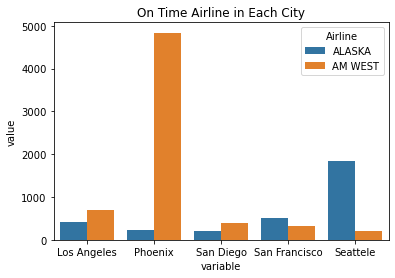

In [35]:
# Graphing the on time data into a barplot. 

sns.barplot( x="variable", y="value", hue="Airline", data=ontime)
plt.title("On Time Airline in Each City", fontsize=12) 

According to the graph above: 
1. For Los Angeles, "AM WEST" has the best on time performance. 
2. For Phoenix, "AM WEST" has the best on time performance. 
3. For San Diego, "AM WEST" has the best on time performance. 
4. For San Francisco, "ALASKA" has the best on time performance. 
5. For Seattele, "ALASKA" has the best on time performance. 

### 2. Which airline had the best overall on time performance?; etc.<br>

          value
Airline        
ALASKA    640.8
AM WEST  1287.6


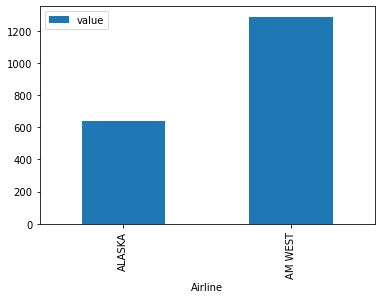

In [36]:
# Calculating the mean of on-time value for each airline

mean=ontime.groupby(['Airline']).mean()
print(mean)

# Graphing a barplot of the mean
mean.plot.bar()

          value
Airline        
ALASKA   3204.0
AM WEST  6438.0


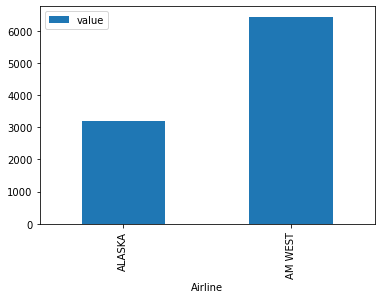

In [37]:
# Calculating the sum of on-time value for each airline

sum = ontime.groupby(['Airline']).sum()
print(sum)

# Graphing a barplot of  the sum
sum.plot.bar()

### Calculating the  percentage of on time flights for each airline

In [38]:
# Finding the flights that are  "ALASKA" airline
# Finding the on time flights that are  "ALASKA" airline
# Calculating the percentage of on time flights that are "ALASKA" airline 
# Using (on time flights that are  "ALASKA" airline) / (Total flightsthat are  "ALASKA" airline) to calculate the percentage 

Alaska =long1[long1['Airline'] == 'ALASKA']

Alaska_ontime = Alaska[Alaska['Performance'] == 'on time']

Percentage1 = ((Alaska_ontime['value'].sum())/(Alaska['value'].sum()))* 100

print(Percentage1)

86.47773279352226


As a result, 86% of Alaska's flights were on time. 

In [39]:
# Finding the flights that are  "AM WEST" airline
# Finding the on time flights that are  "AM WEST" airline
# Calculating the percentage of on time flights that are "AM WEST" airline 
# Using (on time flights that are  "AM WEST" airline) / (Total flightsthat are  "AM WEST" airline) to calculate the percentage 

Am_west =long1[long1['Airline'] == 'AM WEST']

Am_west_ontime = Am_west[Am_west['Performance'] == 'on time']

Percentage2 = ((Am_west_ontime['value'].sum())/(Am_west['value'].sum()))*100

print(Percentage2)

89.10726643598615


As a result, 89% of AM West's flights were on time.

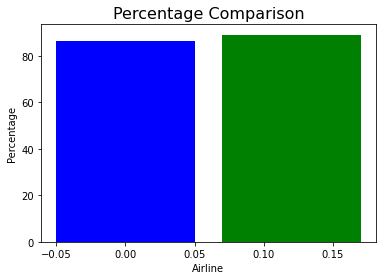

In [40]:
data = [[Percentage1], [Percentage2]]

X = np.arange(1)
plt.bar(X, data[0], color = 'b', width = 0.1)
plt.bar(X + 0.12, data[1], color = 'g', width = 0.1)
plt.xlabel("Airline") 
plt.ylabel("Percentage") 
plt.title("Percentage Comparison", fontsize=16) 

plt.show()

As above graph shows, the green bar, which represents the percentage of on time flights that are "AM WEST" airline, has higher number

#### In conclusion, according to the above tables and bar plots show that AM WEST has the best overall on time performance. Because it has better percentage of on time flights, bigger mean of on time performance, and bigger number of overall on time performance. 

### 3. For each city, which airline had the worst delayed performance?;<br>

In [41]:
# Finding the 'delayed' data in the table

delayed = long1[long1['Performance']=='delayed']
delayed

,Airline,Performance,variable,value
1,ALASKA,delayed,Los Angeles,62.0
3,AM WEST,delayed,Los Angeles,117.0
5,ALASKA,delayed,Phoenix,12.0
7,AM WEST,delayed,Phoenix,415.0
9,ALASKA,delayed,San Diego,20.0
11,AM WEST,delayed,San Diego,65.0
13,ALASKA,delayed,San Francisco,102.0
15,AM WEST,delayed,San Francisco,129.0
17,ALASKA,delayed,Seattele,305.0
19,AM WEST,delayed,Seattele,61.0


Text(0.5, 1.0, 'Delayed Airline in Each City')

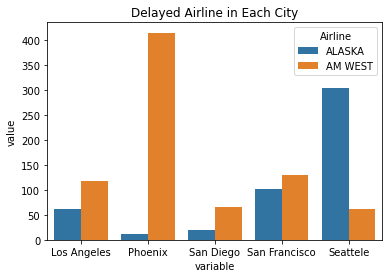

In [42]:
# Graphing the delayed data into a barplot. 

sns.barplot( x="variable", y="value", hue="Airline", data=delayed)
plt.title("Delayed Airline in Each City", fontsize=12) 

According to the graph above: 
1. For Los Angeles, "AM WEST" has the worst delayed performance.
2. For Phoenix, "AM WEST" has the worst delayed performance. 
3. For San Diego, "AM WEST" has the worst delayed performance.
4. For San Francisco,  "AM WEST" has the worst delayed performance.
5. For Seattele, "ALASKA" has the worst delayed performance.

Reference: 

1. https://cmdlinetips.com/2020/06/pandas-melt-reshape-wide-data-to-long-tidy-data/

## Q4: 

(4) (4 Points) Finally, given your “tidy” long format structure, consider what, if any, changes you would make
to the visual presentation of the data if you were then asked to transform your “long” data back into a “wide”
format: would you mimic the structure of the graphic shown above? 



To convert “long” data back into a “wide” format, I would use  "variable" that represents each city, and "Performance" as index; and use "Airline" as a column. The "wide" format makes it easier to compare each airline's performance in each city, which will make task 2 easier than the "long" format. Also, if there are too many airlines in the dataset, the "wide" format will organize the information better than the "long" format because we can compare each airline more directly. 



In [43]:
# By using 'pivot_table' to transform the “long” data back into a “wide” format
# To get rid of the multi-index, use .reset_index()

long1.pivot_table(index=['variable','Performance'], 
                    columns='Airline', 
                    values='value').reset_index()

Airline,variable,Performance,ALASKA,AM WEST
0,Los Angeles,delayed,62.0,117.0
1,Los Angeles,on time,427.0,694.0
2,Phoenix,delayed,12.0,415.0
3,Phoenix,on time,221.0,4840.0
4,San Diego,delayed,20.0,65.0
5,San Diego,on time,212.0,383.0
6,San Francisco,delayed,102.0,129.0
7,San Francisco,on time,503.0,320.0
8,Seattele,delayed,305.0,61.0
9,Seattele,on time,1841.0,201.0


Reference: https://hausetutorials.netlify.app/posts/2020-05-17-reshape-python-pandas-dataframe-from-long-to-wide-with-pivottable/

Therefore, the different format has its own pro and cons. It depends on what is the purpose and goal of the dataset, and choose the best format that could fit that goal. 